In [510]:
!pip install xgboost


   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.2/72.0 MB 5.0 MB/s eta 0:00:15
   ---------------------------------------- 0.4/72.0 MB 4.2 MB/s eta 0:00:17
   ---------------------------------------- 0.6/72.0 MB 4.0 MB/s eta 0:00:18
   ---------------------------------------- 0.7/72.0 MB 3.8 MB/s eta 0:00:19
    --------------------------------------- 0.9/72.0 MB 4.1 MB/s eta 0:00:18
    --------------------------------------- 1.1/72.0 MB 4.0 MB/s eta 0:00:18
    --------------------------------------- 1.3/72.0 MB 4.0 MB/s eta 0:00:18
    --------------------------------------- 1.5/72.0 MB 4.1 MB/s eta 0:00:18
    --------------------------------------- 1.6/72.0 MB 3.9 MB/s eta 0:00:19
   - -------------------------------------- 1.8/72.0 MB 3.8 MB/s eta 0:00:19
   - -------------------------------------- 1.9/72.0 MB 3.7 MB/s eta 0:00:19
   - -------------------------------------- 2.1/72.0 MB 3.6 MB/s eta 0:00:20
   - -

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

In [5]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [7]:
test_data.shape

(1459, 80)

In [9]:
test_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [11]:
combined= pd.concat([train_data, test_data], axis=0)

In [13]:
combined.shape

(2919, 81)

In [15]:
combined.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [17]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallCond  

In [19]:
combined.isnull().sum()[combined.isnull().sum() > 0]


MSZoning           4
LotFrontage      486
Alley           2721
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType      1766
MasVnrArea        23
BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinSF1         1
BsmtFinType2      80
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Electrical         1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu     1420
GarageType       157
GarageYrBlt      159
GarageFinish     159
GarageCars         1
GarageArea         1
GarageQual       159
GarageCond       159
PoolQC          2909
Fence           2348
MiscFeature     2814
SaleType           1
SalePrice       1459
dtype: int64

In [21]:
cols_to_drop=['MiscFeature','Fence','PoolQC','Alley','MasVnrType','Id']
combined=combined.drop(columns=cols_to_drop)

In [23]:
combined.shape

(2919, 75)

In [25]:
combined.isnull().sum()[combined.isnull().sum() > 0]


MSZoning           4
LotFrontage      486
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrArea        23
BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinSF1         1
BsmtFinType2      80
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Electrical         1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu     1420
GarageType       157
GarageYrBlt      159
GarageFinish     159
GarageCars         1
GarageArea         1
GarageQual       159
GarageCond       159
SaleType           1
SalePrice       1459
dtype: int64

In [27]:
combined.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,2918.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000
mean,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,49.582248,...,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,180921.195890
std,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,169.205611,...,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129975.000000
50%,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,0.000000,...,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,0.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [29]:
numerical_data=combined.select_dtypes(include=['number'])

In [31]:
numerical_data

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,61,0,0,0,0,0,2,2008,208500.0
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,298,0,0,0,0,0,0,5,2007,181500.0
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,42,0,0,0,0,0,9,2008,223500.0
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,35,272,0,0,0,0,2,2006,140000.0
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,192,84,0,0,0,0,0,12,2008,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,21.0,1936,4,7,1970,1970,0.0,0.0,0.0,...,0,0,0,0,0,0,0,6,2006,NaN
1455,160,21.0,1894,4,5,1970,1970,0.0,252.0,0.0,...,0,24,0,0,0,0,0,4,2006,NaN
1456,20,160.0,20000,5,7,1960,1996,0.0,1224.0,0.0,...,474,0,0,0,0,0,0,9,2006,NaN
1457,85,62.0,10441,5,5,1992,1992,0.0,337.0,0.0,...,80,32,0,0,0,0,700,7,2006,NaN


In [33]:
#Detecting outliers
Q1= combined['SalePrice'].quantile(0.25)
Q3=combined['SalePrice'].quantile(0.75)

IQR= Q3- Q1

lower_bound= Q1- 1.5*IQR
upper_bound= Q3 +1.5*IQR

outliers= combined[(combined['SalePrice'] <lower_bound) | (combined['SalePrice'] > upper_bound)]

print(len(outliers))

61


In [35]:
#Imputing Missing Values for Numerical Columns

combined['LotFrontage']= combined['LotFrontage'].fillna(combined['LotFrontage'].mean())
combined['MasVnrArea']=combined['MasVnrArea'].fillna(combined['MasVnrArea'].mean())
combined['GarageYrBlt']=combined['GarageYrBlt'].fillna(combined['GarageYrBlt'].mean())


#imputing missing values for categorical columns
combined['KitchenQual']=combined['KitchenQual'].fillna(combined['KitchenQual'].mode()[0])
combined['SaleType']=combined['SaleType'].fillna(combined['SaleType'].mode()[0])
combined['BsmtQual']=combined['BsmtQual'].fillna(combined['BsmtQual'].mode()[0])
combined['BsmtCond']=combined['BsmtCond'].fillna(combined['BsmtCond'].mode()[0])
combined['BsmtExposure']=combined['BsmtExposure'].fillna(combined['BsmtExposure'].mode()[0])
combined['BsmtFinType1']=combined['BsmtFinType1'].fillna(combined['BsmtFinType1'].mode()[0])
combined['BsmtFinType2']=combined['BsmtFinType2'].fillna(combined['BsmtFinType2'].mode()[0])
combined['Electrical']=combined['Electrical'].fillna(combined['Electrical'].mode()[0])
combined['FireplaceQu']=combined['FireplaceQu'].fillna(combined['FireplaceQu'].mode()[0])

combined['GarageType']=combined['GarageType'].fillna(combined['GarageType'].mode()[0])
combined['GarageFinish']=combined['GarageFinish'].fillna(combined['GarageFinish'].mode()[0])
combined['GarageQual']=combined['GarageQual'].fillna(combined['GarageQual'].mode()[0])
combined['GarageCond']=combined['GarageCond'].fillna(combined['GarageCond'].mode()[0])

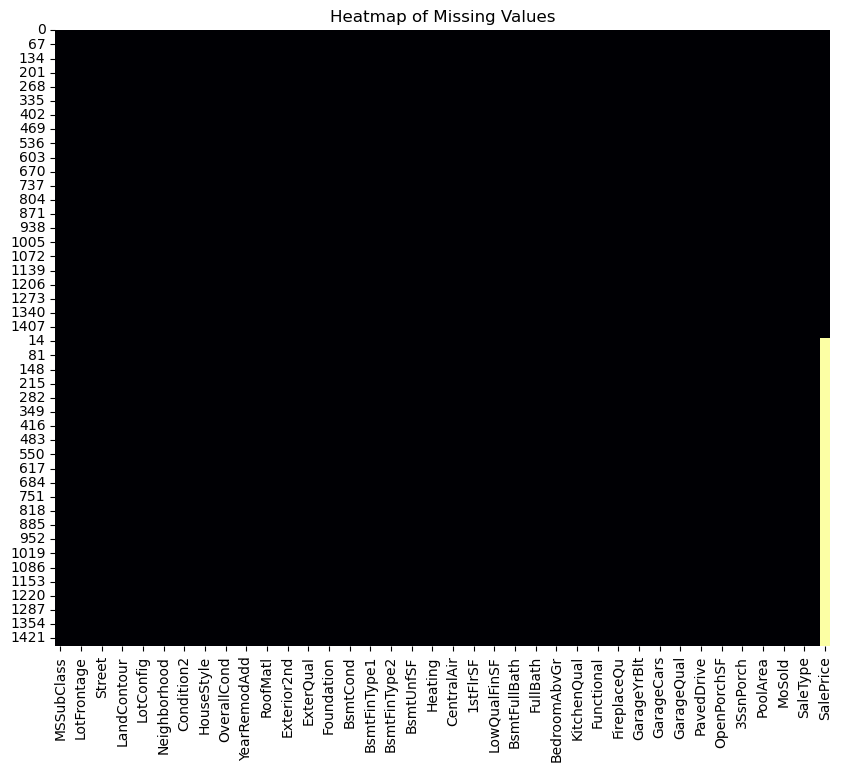

In [37]:
plt.figure(figsize=(10,8))
sns.heatmap(combined.isnull(),cbar=False,cmap='inferno')
plt.title('Heatmap of Missing Values')
plt.show()          
           

In [38]:
cat_feat=[feature for feature in combined.select_dtypes(include=['object'])]

In [41]:
for col in cat_feat:
    dummies=pd.get_dummies(combined[col], drop_first=True, prefix=col)
    combined=pd.concat([combined.drop(col, axis=1), dummies], axis=1)

In [43]:
combined.shape

(2919, 234)

In [45]:
combined.duplicated().sum()

0

In [47]:
combined.T.duplicated().sum()

0

In [49]:
combined =combined.loc[:,~combined.columns.duplicated()]

In [51]:
combined.shape

(2919, 234)

In [55]:
year_feature=['YrSold','YearRemodAdd','YearBuilt','GarageYrBlt']

In [57]:
discrete_feature= [feature for feature in numerical_data
                   if len(train_data[feature].unique())<25 and 
                   feature not in year_feature]

In [59]:
discrete_feature

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']

In [61]:
continuous_features= [feature for feature in numerical_data
                      if feature not in discrete_feature + year_feature + ['Id']
                     ]

In [63]:
continuous_features

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'SalePrice']

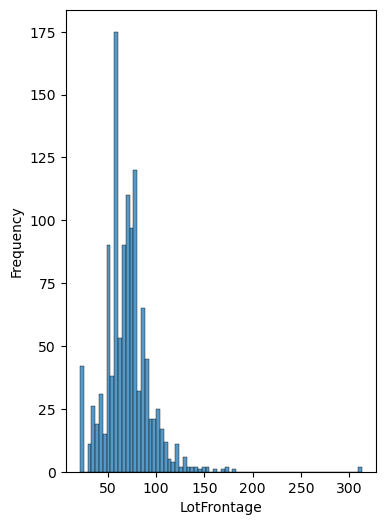

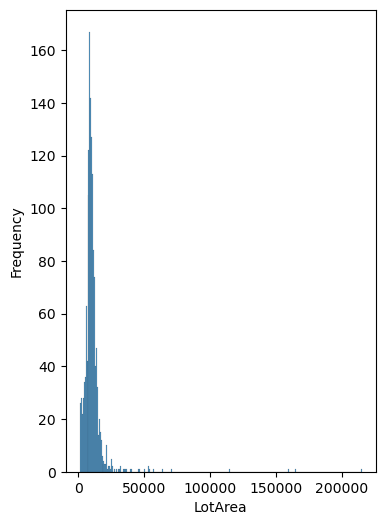

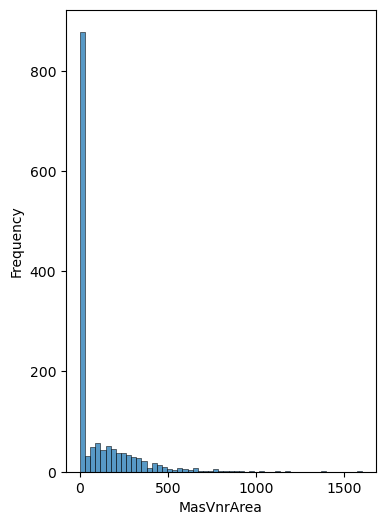

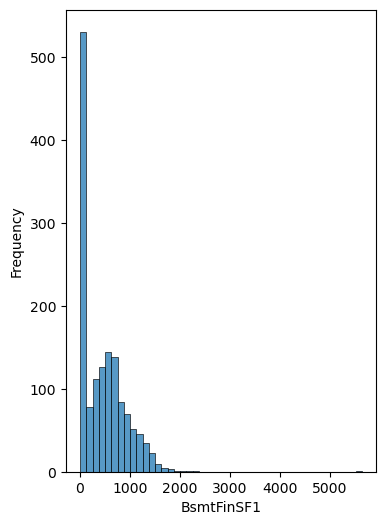

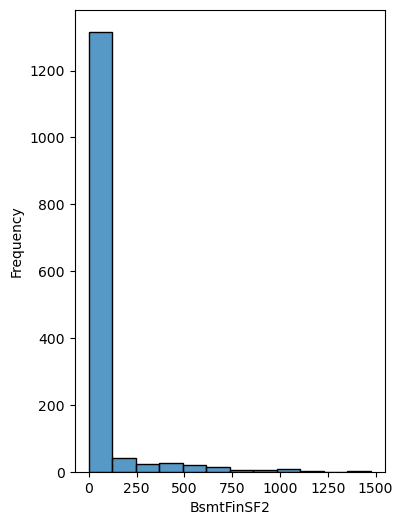

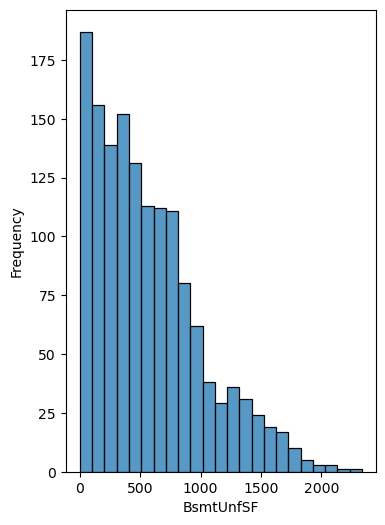

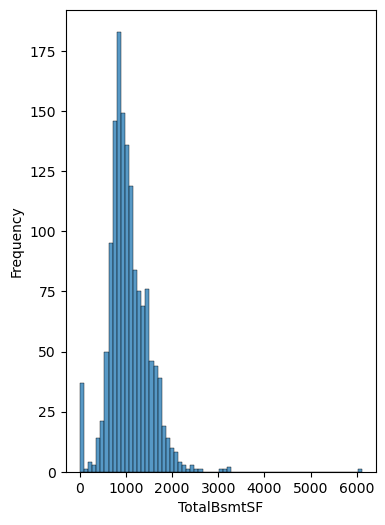

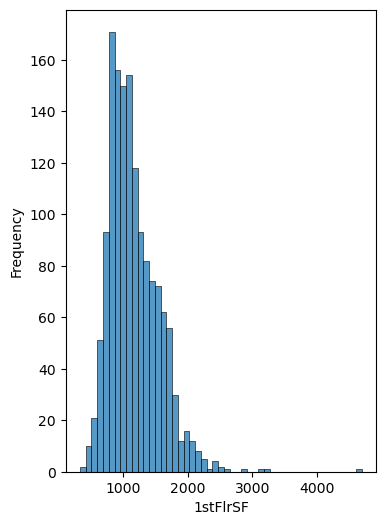

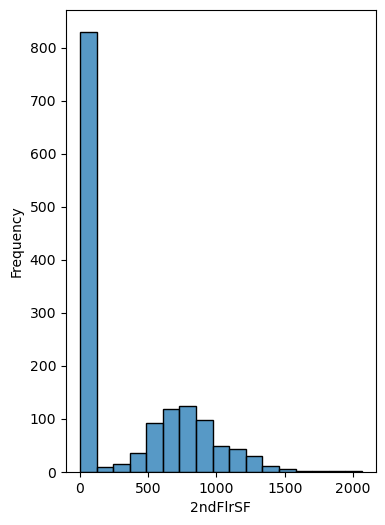

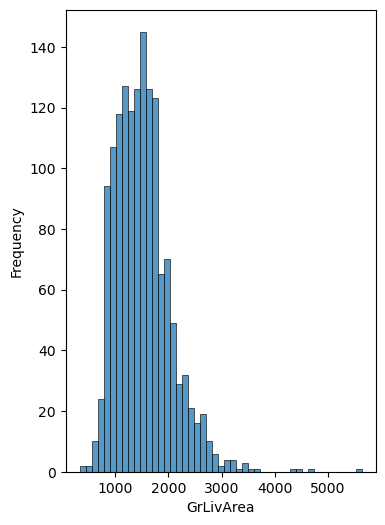

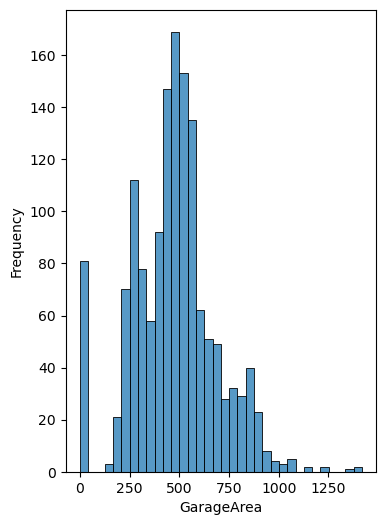

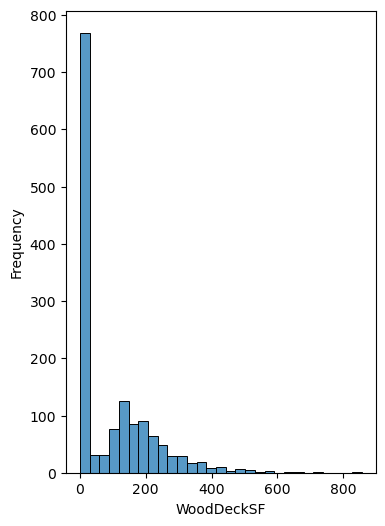

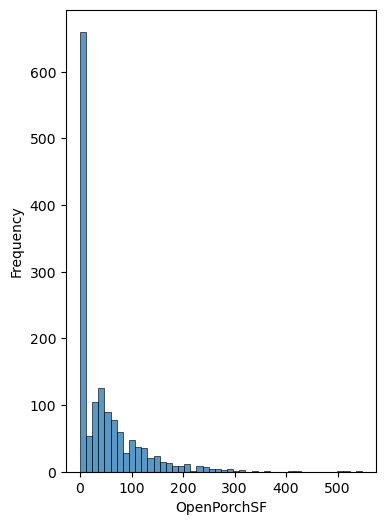

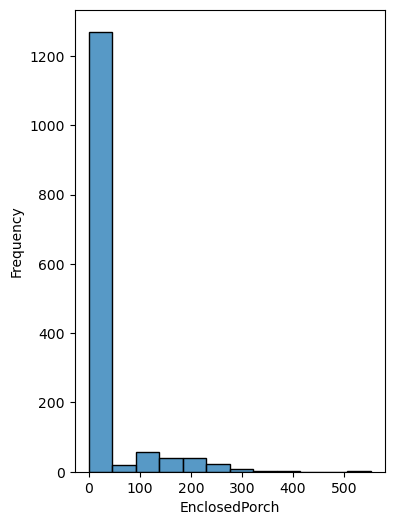

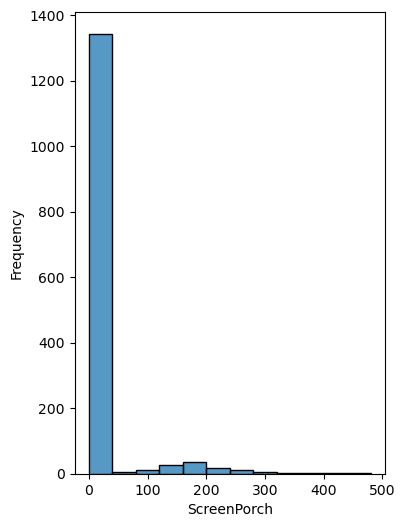

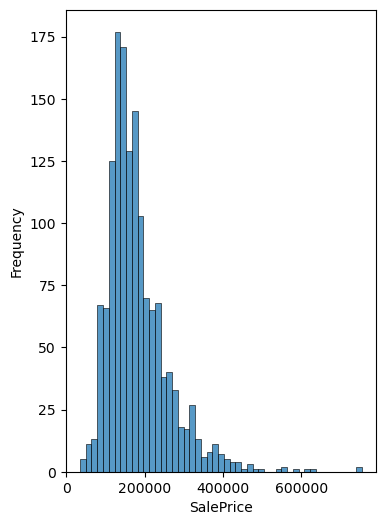

In [65]:
#plotting the continuous features

for feature in continuous_features:
    plt.figure(figsize=(4,6))
    sns.histplot(train_data[feature])
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

In [69]:
#since our continuous features are right-skewed therefore we need to convert them into logarithmic transformation

#combined['SalePrice']=np.log(combined['SalePrice'])

for feature in continuous_features:
    if feature!='SalePrice' and 0 not in combined[feature].unique():
        combined[feature]=np.log(combined[feature])
        
    

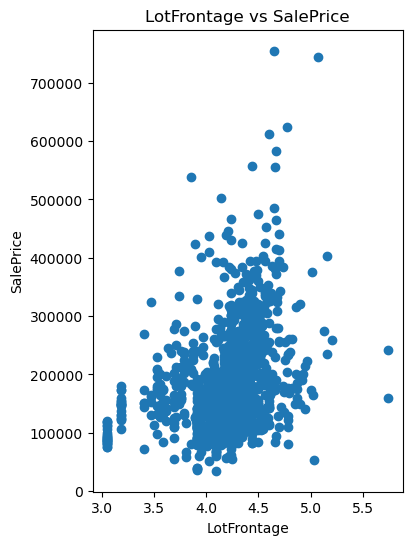

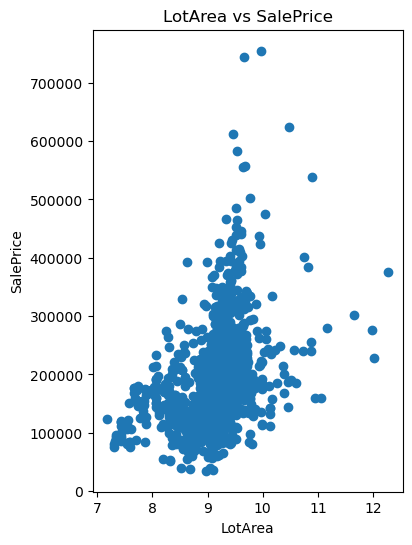

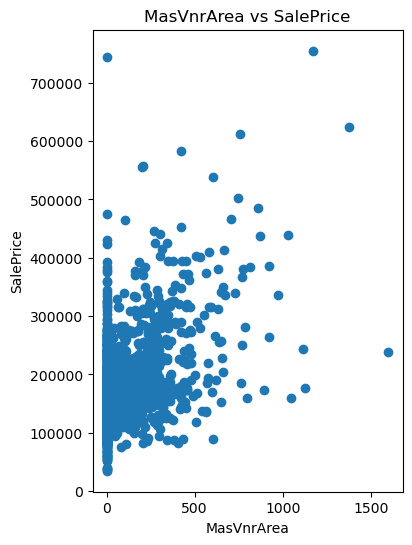

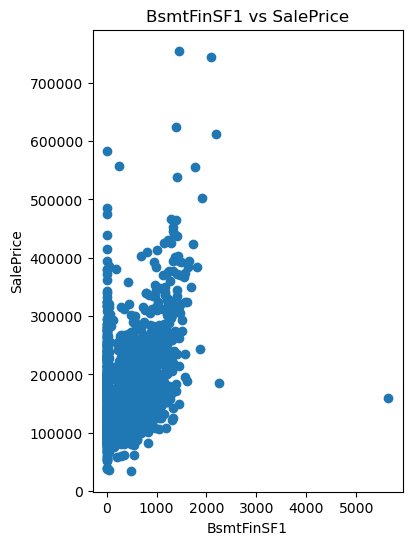

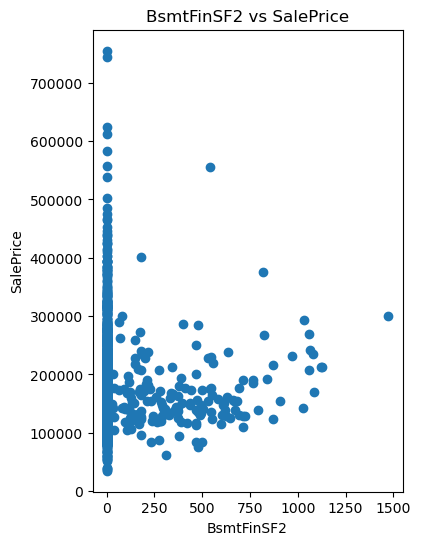

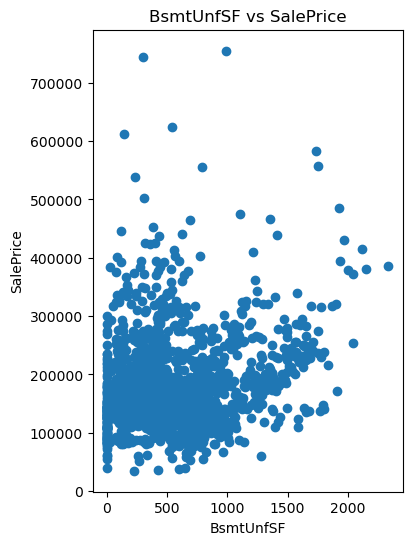

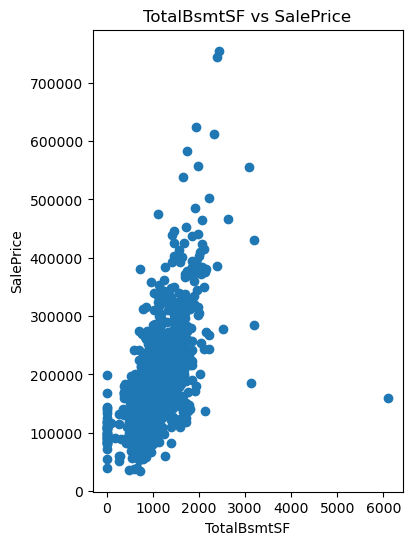

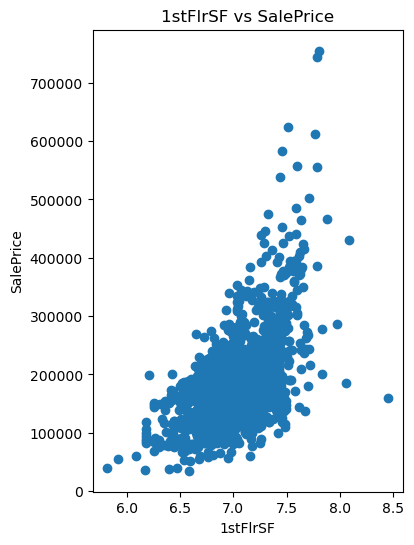

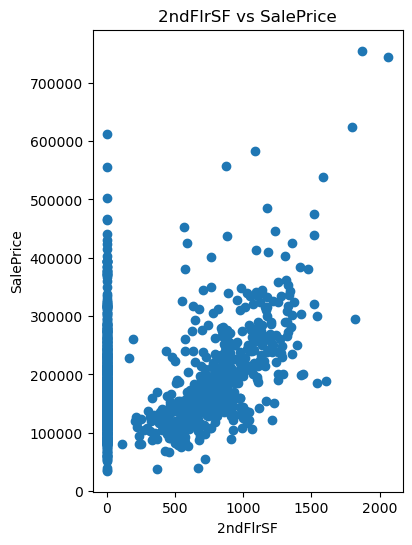

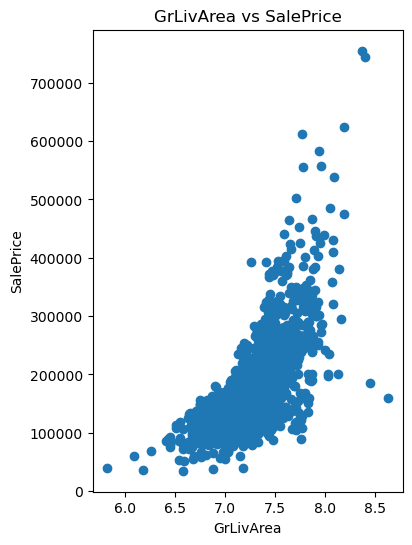

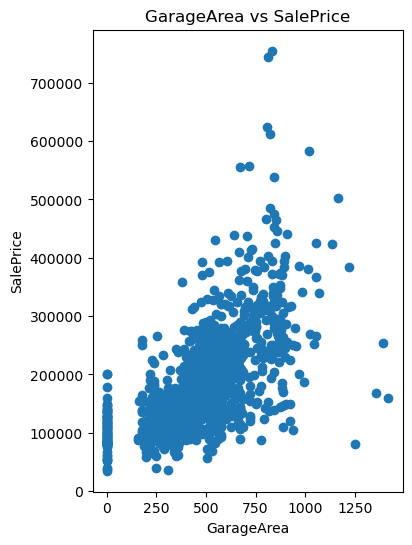

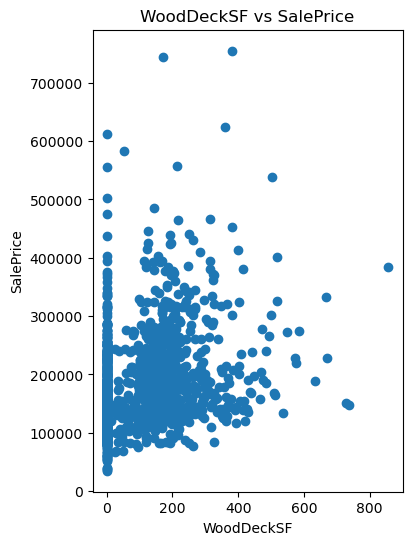

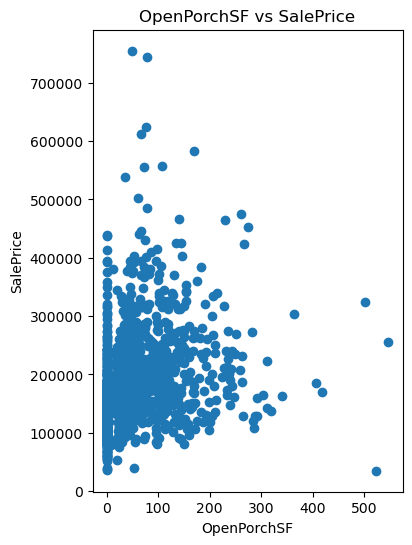

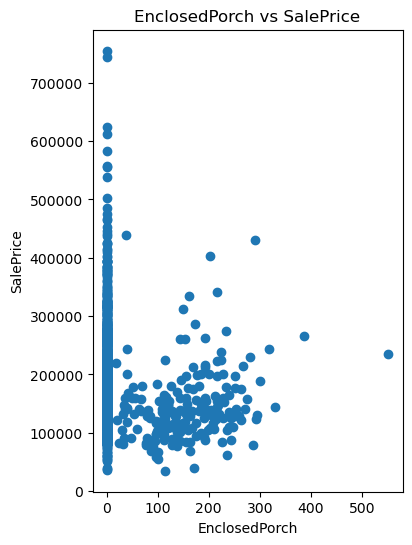

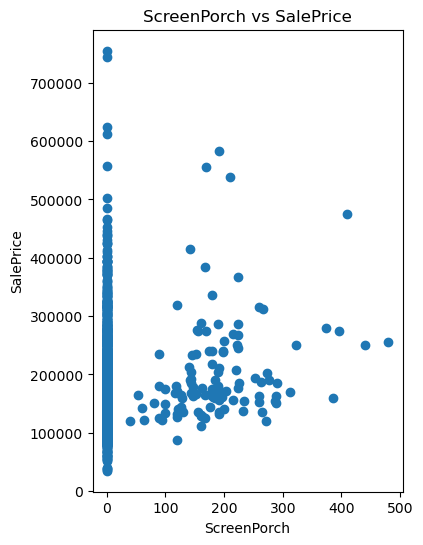

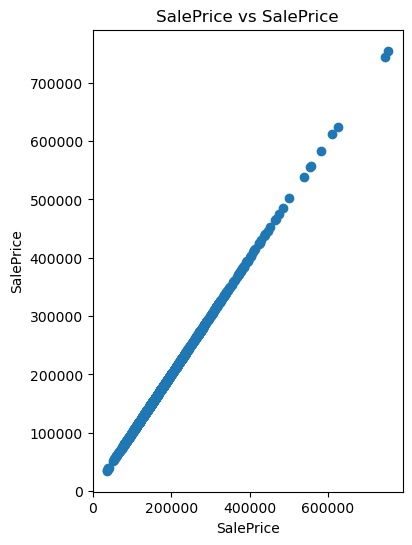

In [71]:
for feature in continuous_features:
    plt.figure(figsize=(4,6))
    plt.scatter(combined[feature],combined['SalePrice'])
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(f'{feature} vs SalePrice')
    plt.show()

In [73]:
#Splitting the combined dataset back into train and test

train_rows= len(train_data)

train_processed= combined.iloc[:train_rows,:].copy()
test_processed = combined.iloc[train_rows:,:].copy()

In [75]:
print(train_processed.shape)
print(test_processed.shape)

(1460, 234)
(1459, 234)


In [77]:
#log-transforming the SalePrice feature noe since in test all its values were 0

train_processed['SalePrice']= np.log(train_processed[feature])

Trying to see if there is a relationship between the years and sale price of the houses

Text(0.5, 1.0, 'Median Prices of Houses vs Year Sold')

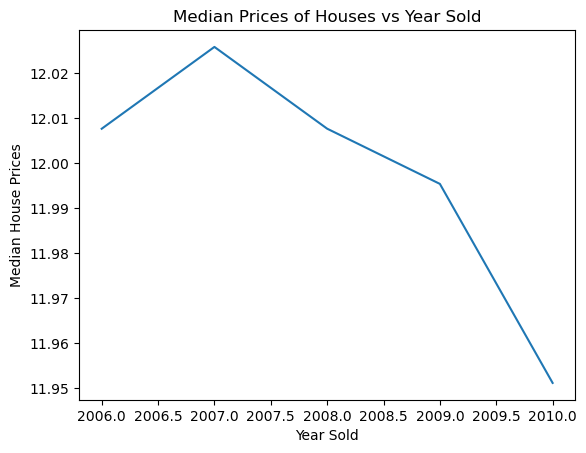

In [80]:
train_processed.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel('Year Sold')
plt.ylabel('Median House Prices')
plt.title('Median Prices of Houses vs Year Sold')

Text(0.5, 1.0, 'Mean House Prices vs Year Sold')

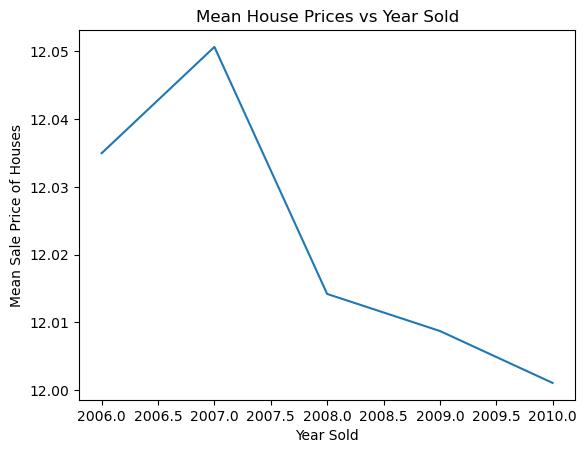

In [82]:
train_processed.groupby('YrSold')['SalePrice'].mean().plot()
plt.xlabel('Year Sold')
plt.ylabel('Mean Sale Price of Houses')
plt.title('Mean House Prices vs Year Sold')

Since the previous graphs didnt convey anything meaningful, we we try to find the age of the houses according to the years in which they were built or remodelled to see if it affects the house price

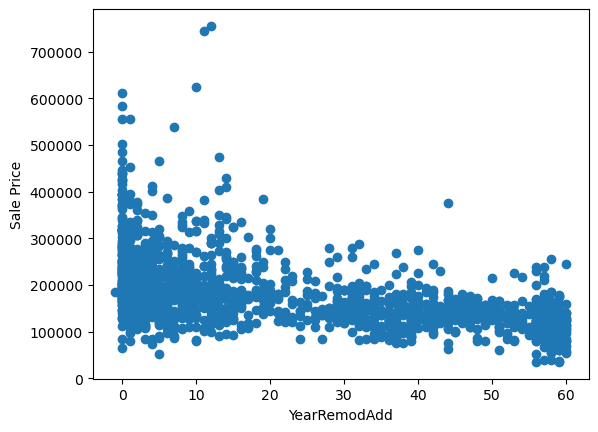

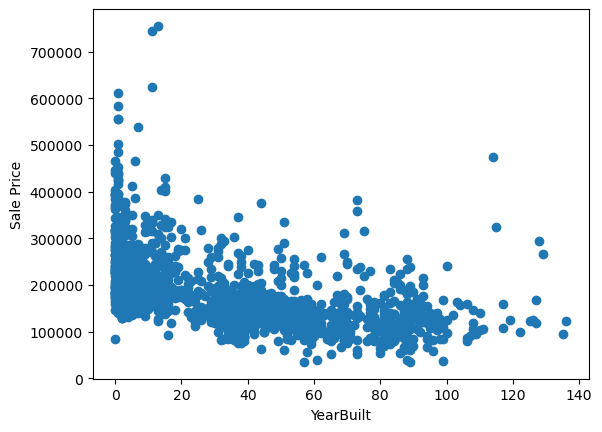

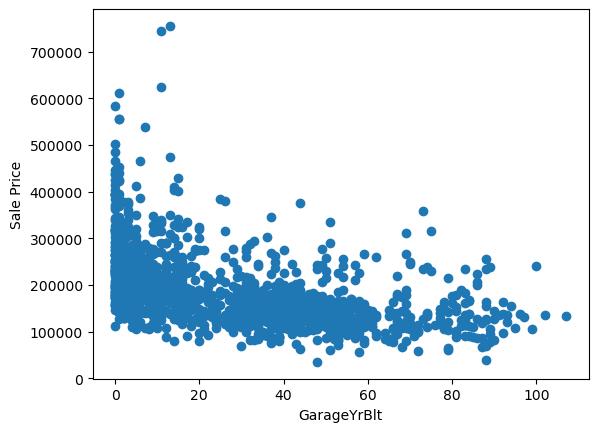

In [85]:
for feature in year_feature:
    if feature != 'YrSold':
        data=train_data.copy()
        data[feature]=data['YrSold']-data[feature]
        plt.scatter(data[feature],data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('Sale Price')
        plt.show()

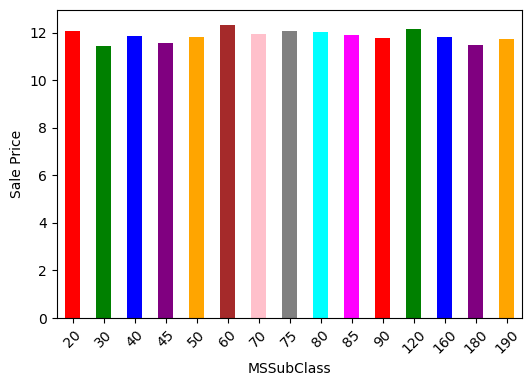

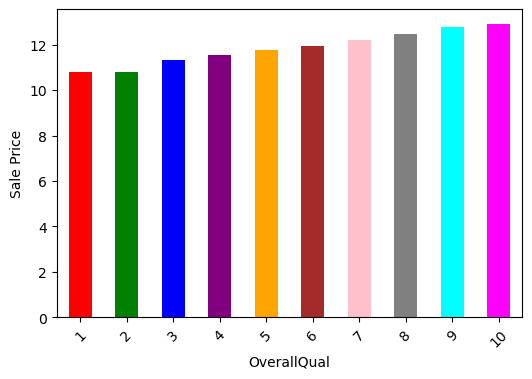

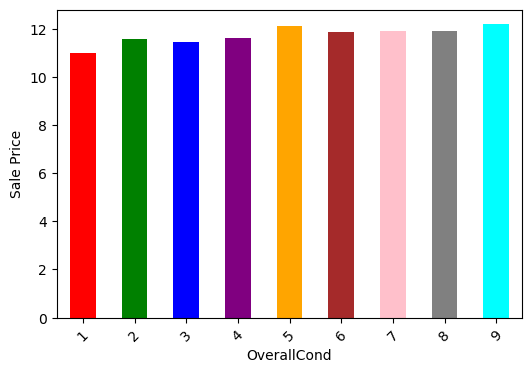

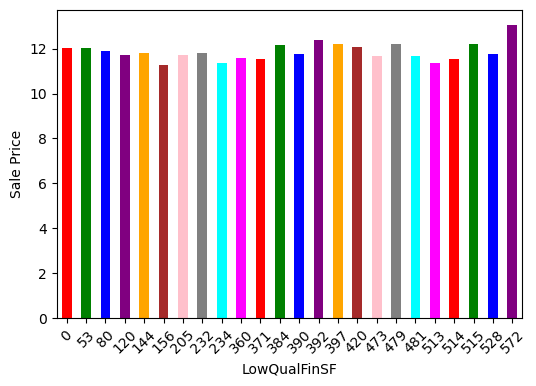

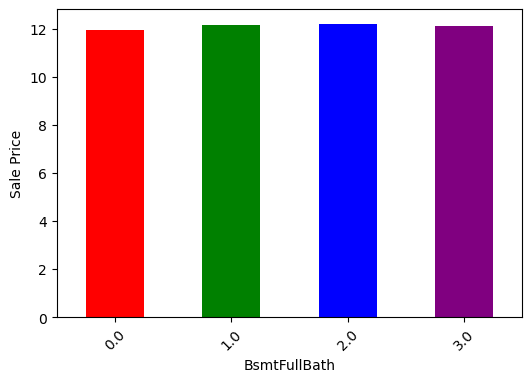

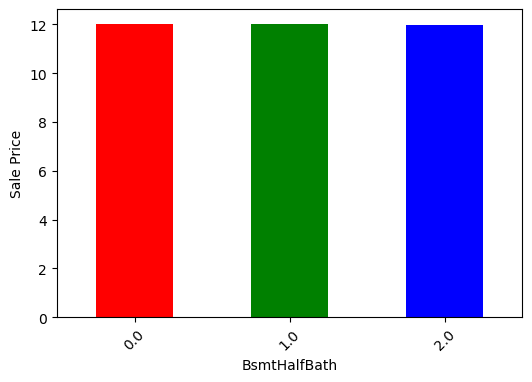

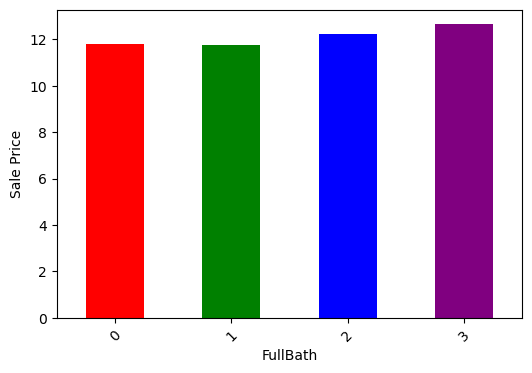

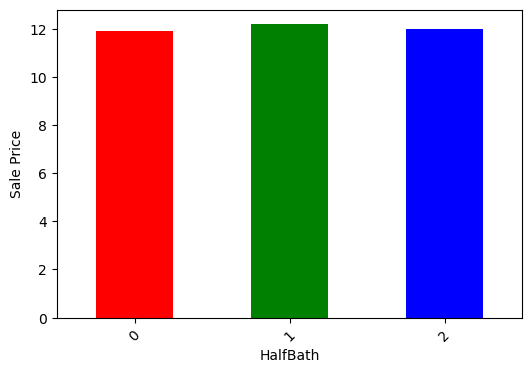

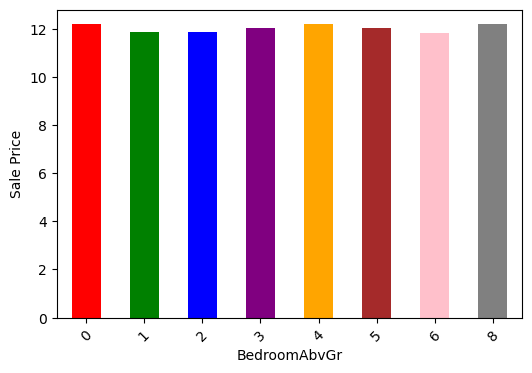

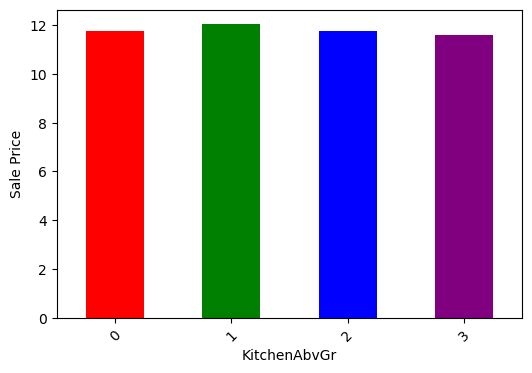

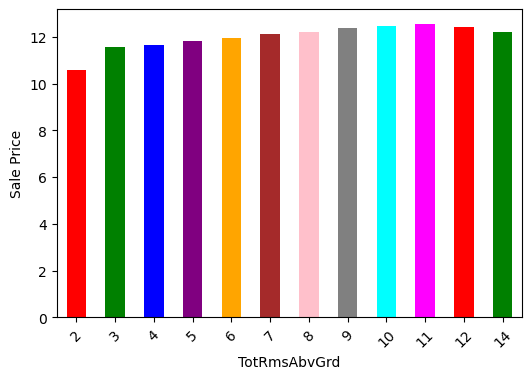

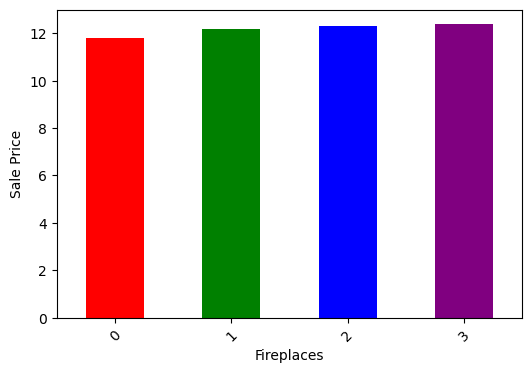

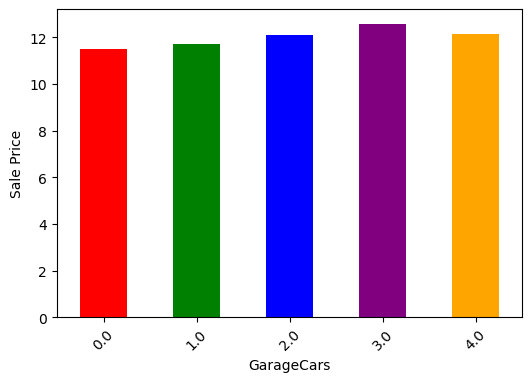

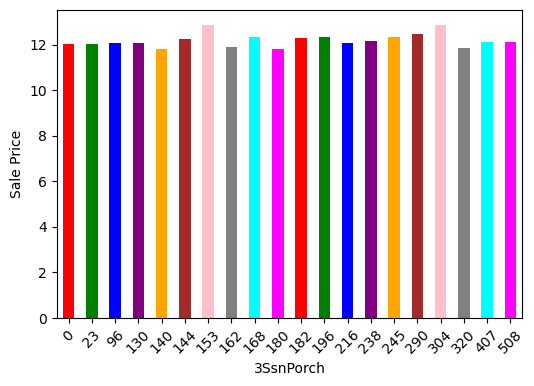

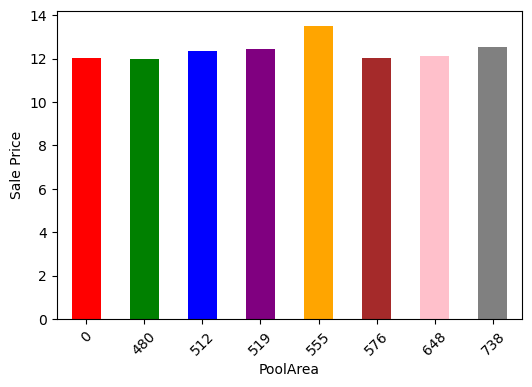

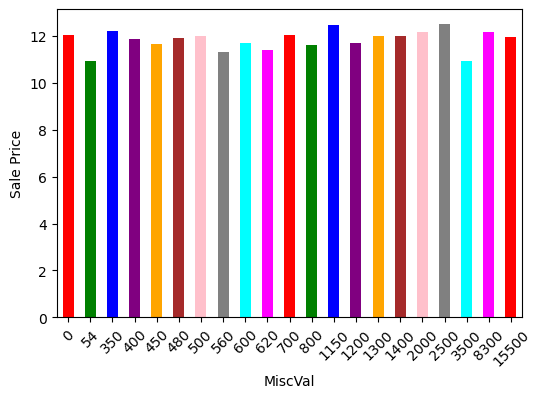

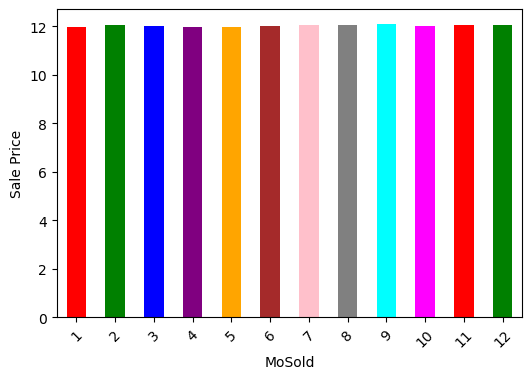

In [87]:
#plotting the discrete features

colors = ['red', 'green', 'blue', 'purple', 'orange', 'brown', 'pink', 'grey', 'cyan', 'magenta']


for feature in discrete_feature:
    data=train_processed.groupby(feature)['SalePrice'].mean()
    plt.figure(figsize=(6,4))
    data.plot(kind='bar', color=colors[:len(data)])
    plt.xticks(rotation=45)
    plt.ylabel('Sale Price')
    plt.show()

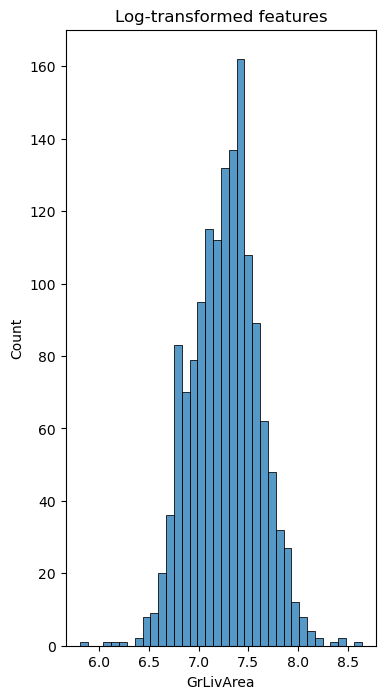

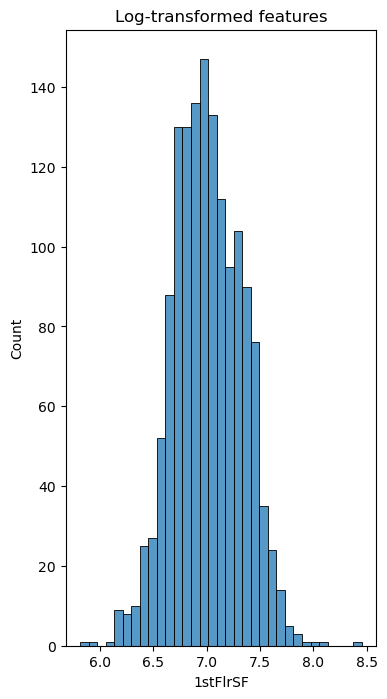

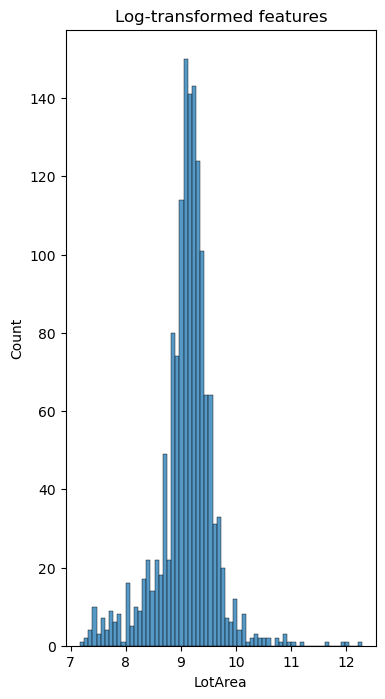

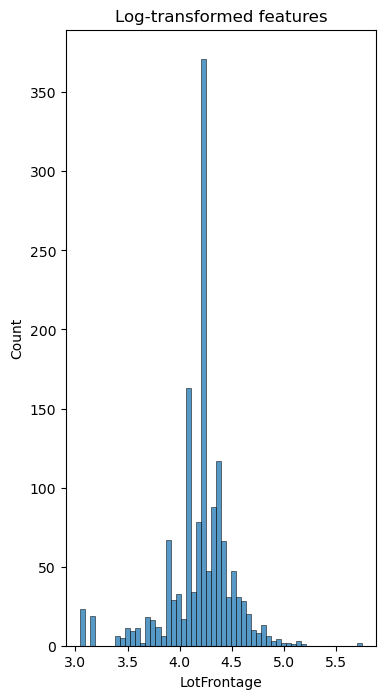

In [89]:
#checking if skewness is removed after log-transformation

for feat in ['GrLivArea','1stFlrSF','LotArea','LotFrontage']:
    plt.figure(figsize=(4,8))
    sns.histplot(train_processed[feat])
    plt.title('Log-transformed features')
    plt.show()

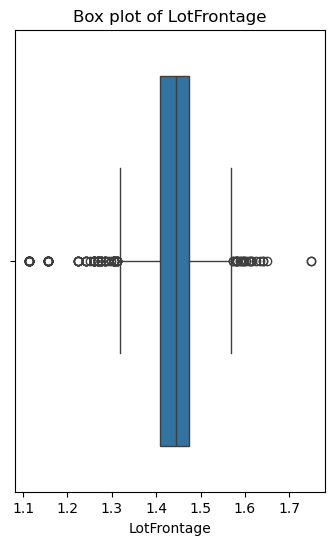

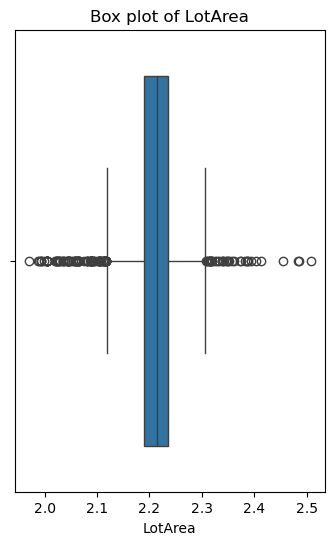

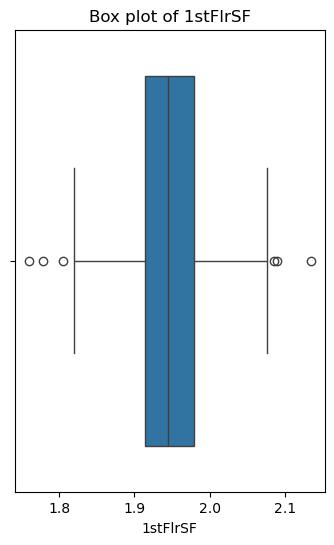

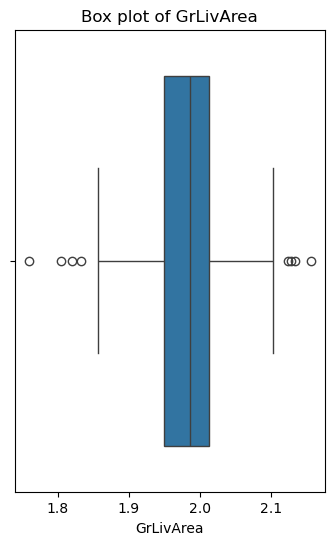

In [91]:
#plotting boxplots to detect outliers
data=train_processed.copy()
data['SalePrice']=np.log(data['SalePrice'])

for feature in continuous_features:
    if feature!='SalePrice' and 0 not in data[feature].unique():
        data[feature]=np.log(data[feature])
        plt.figure(figsize=(4,6))
        sns.boxplot(x=data[feature])
        plt.title(f'Box plot of {feature}')
        plt.show()

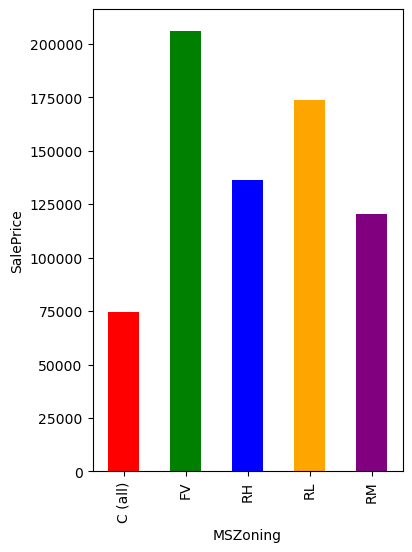

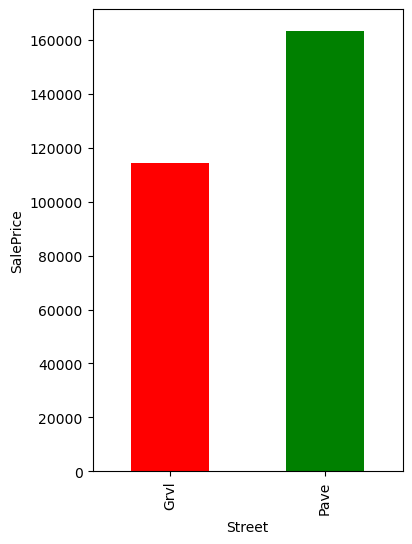

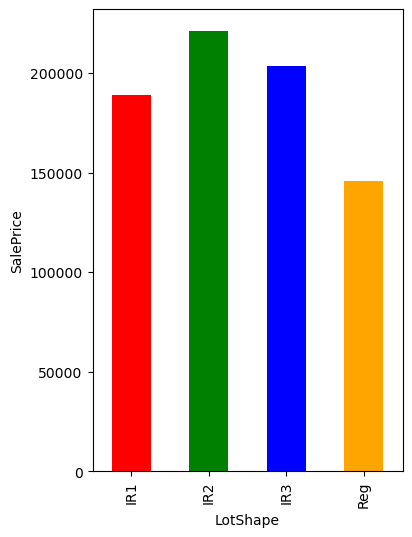

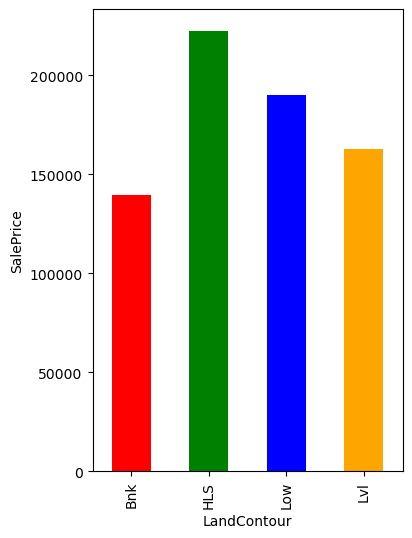

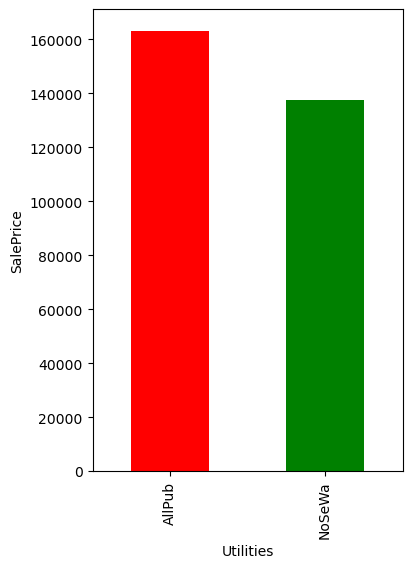

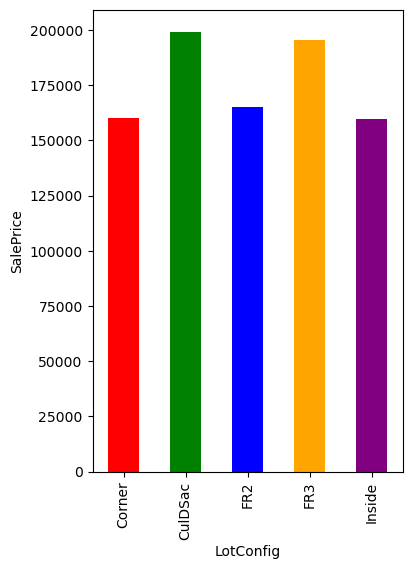

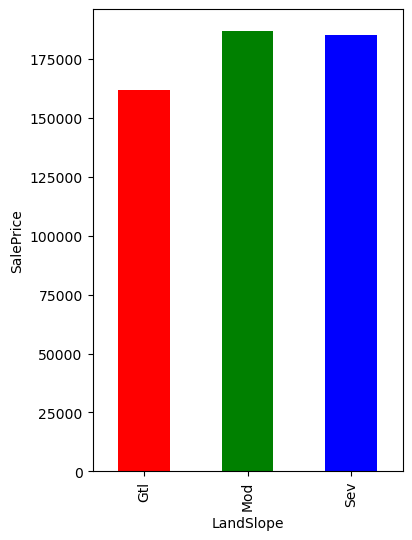

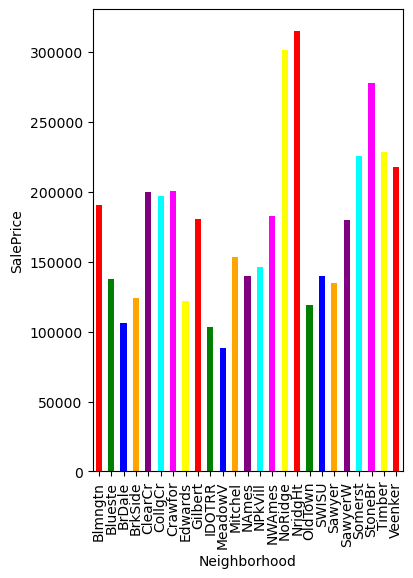

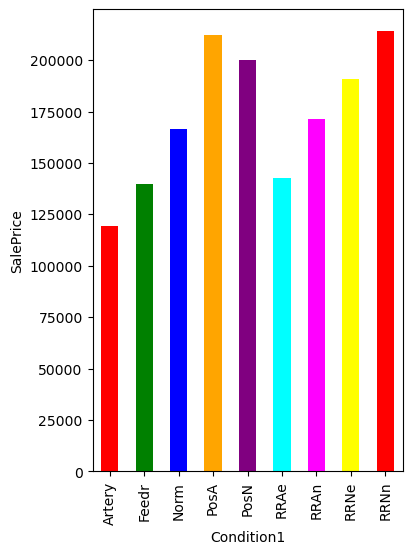

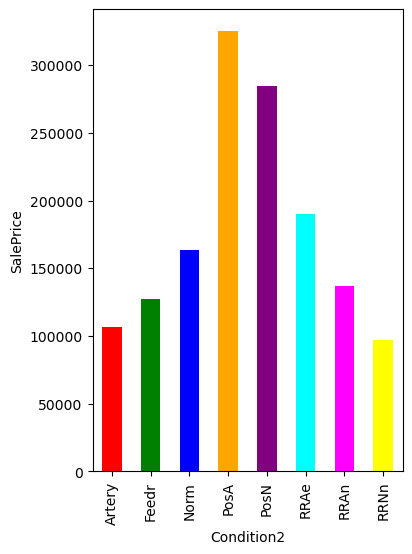

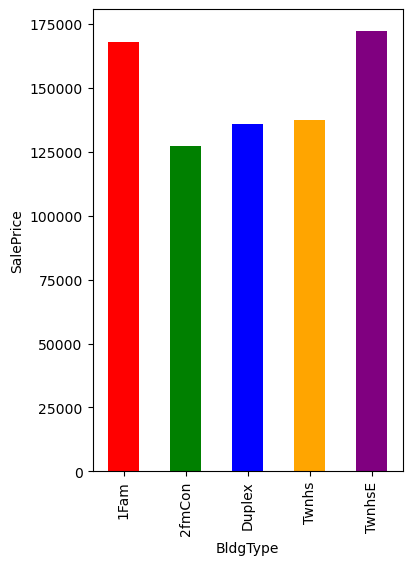

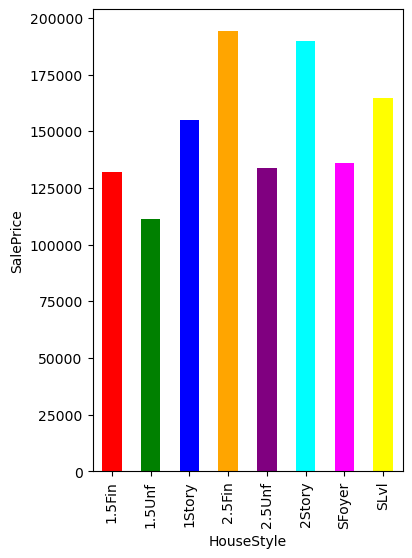

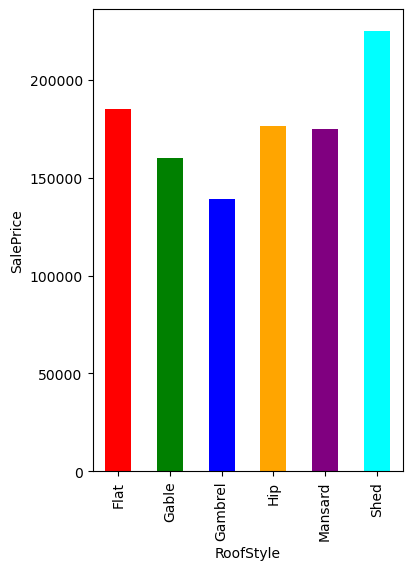

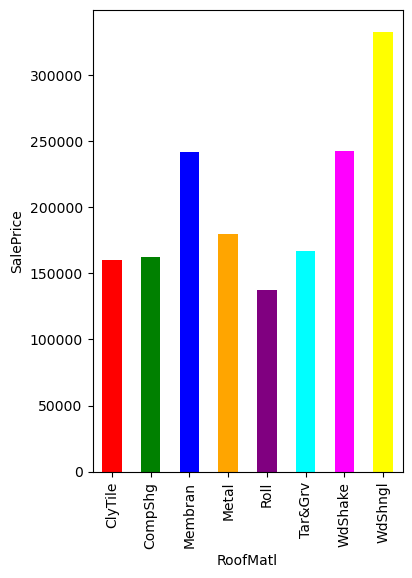

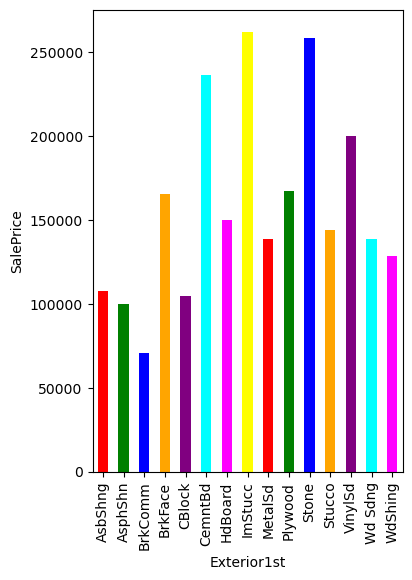

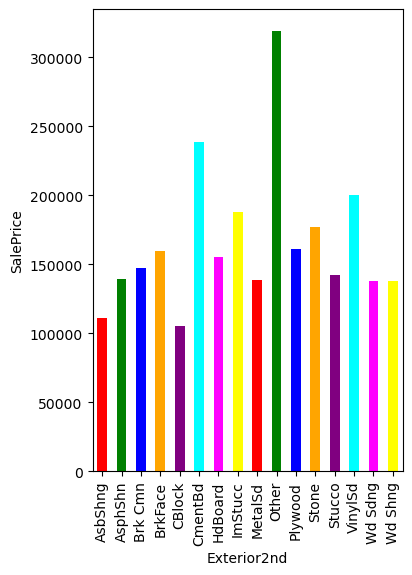

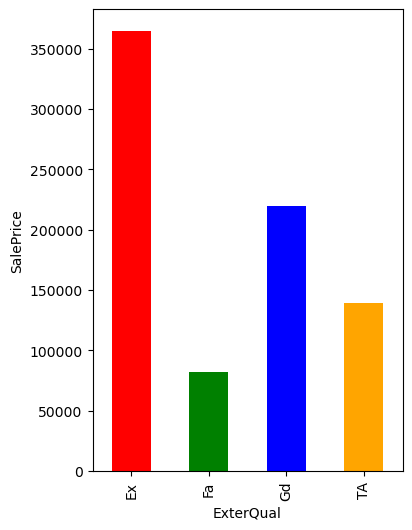

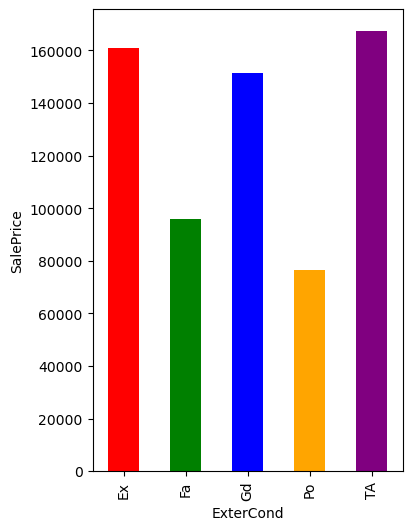

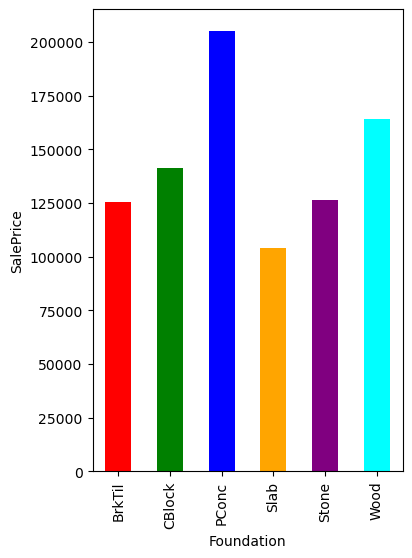

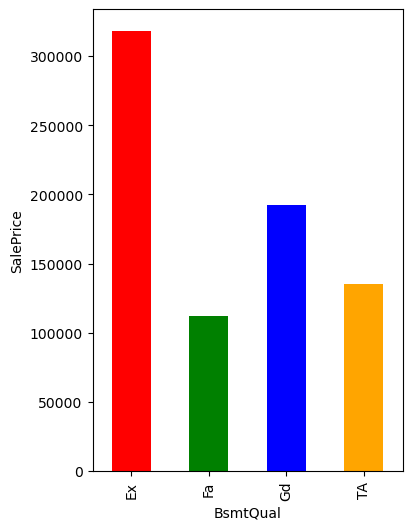

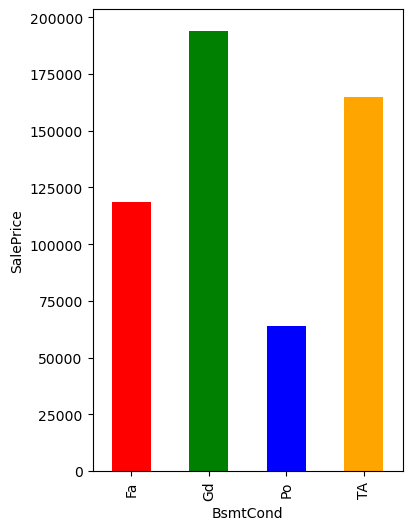

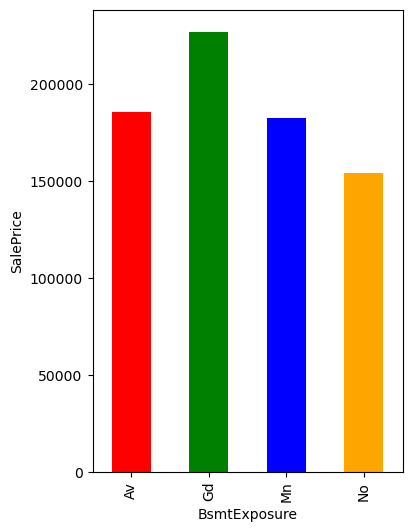

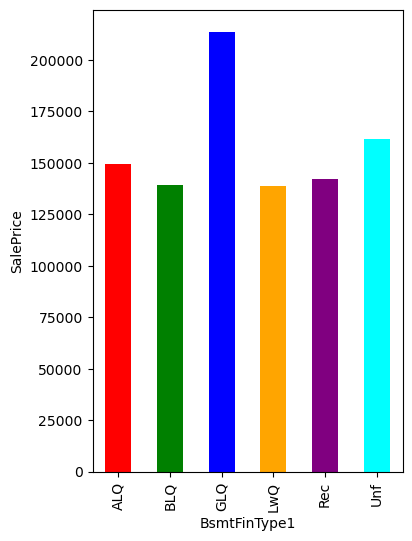

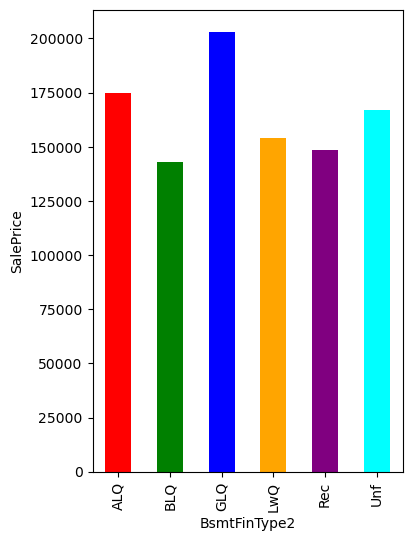

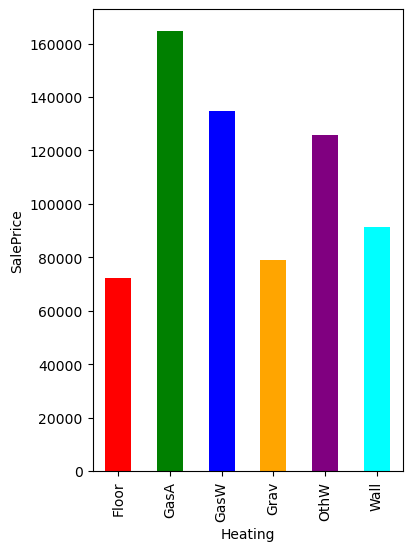

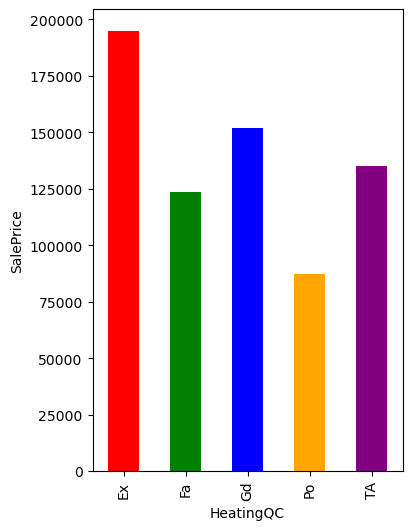

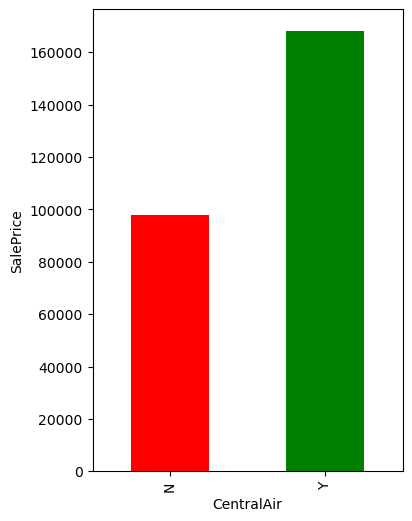

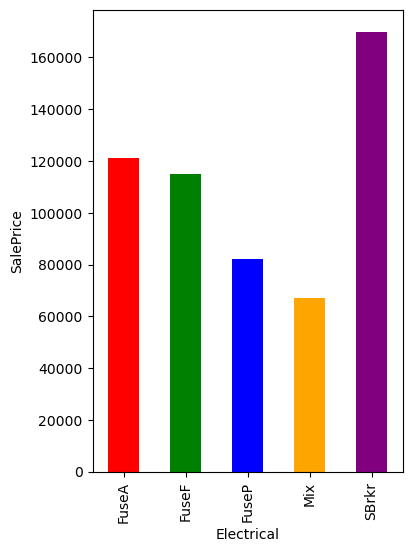

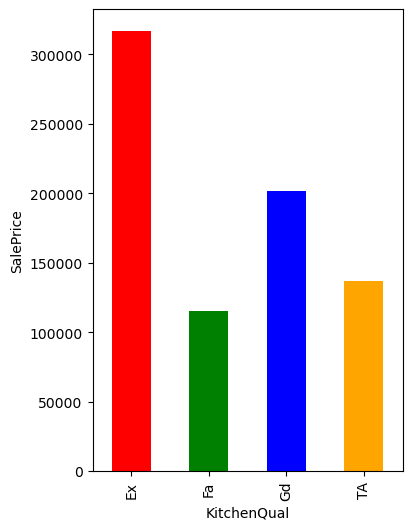

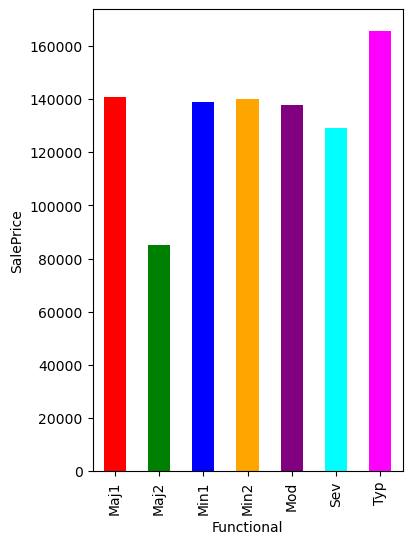

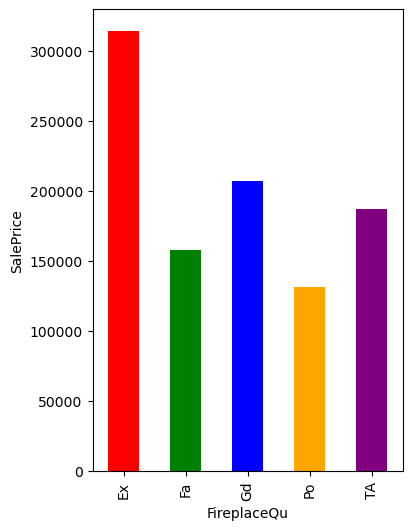

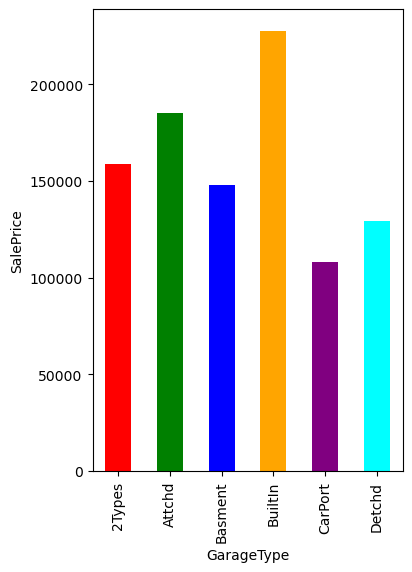

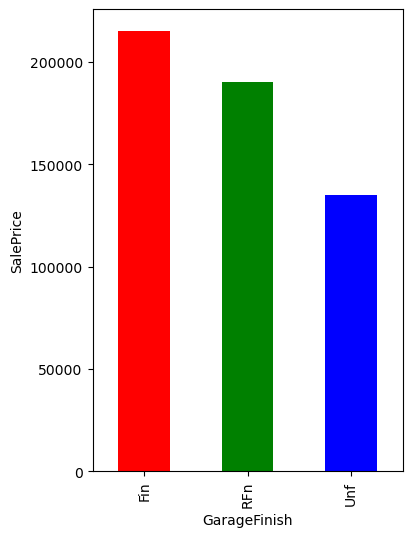

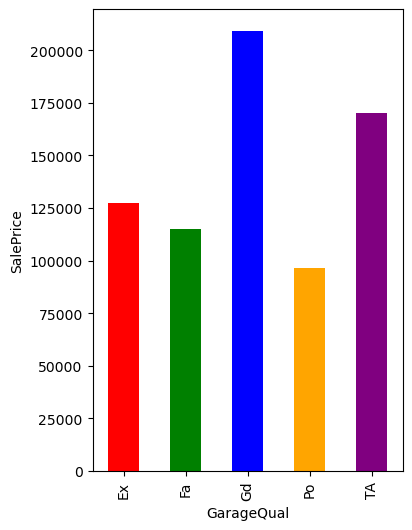

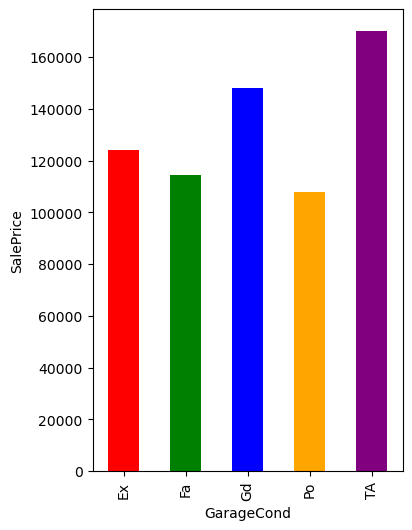

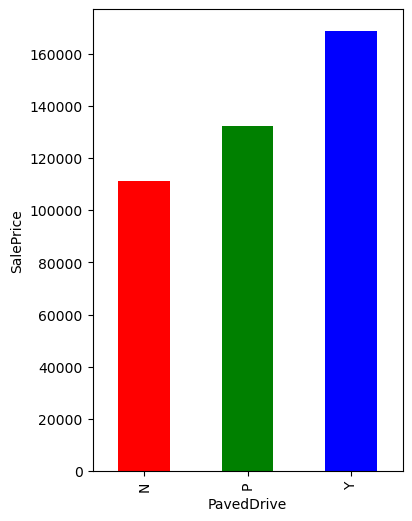

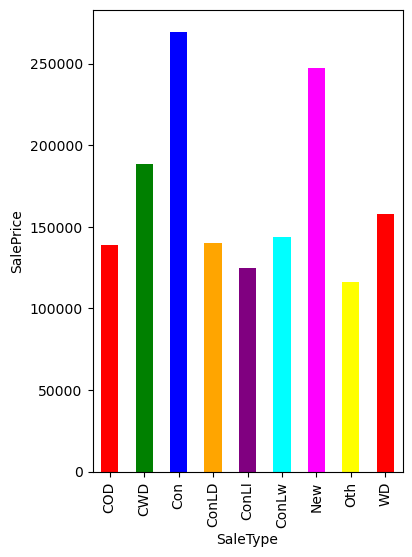

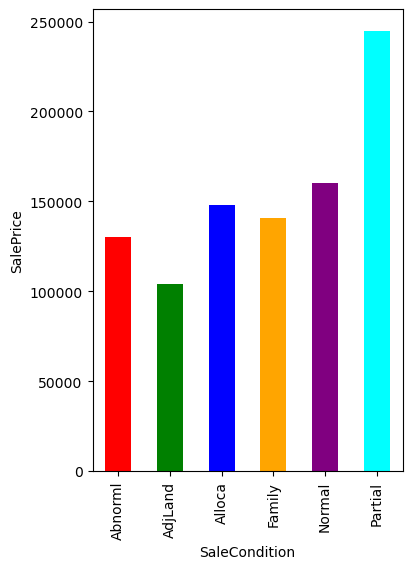

In [93]:
#finding realtionship between the categorical features and target

colors = ['red', 'green', 'blue', 'orange', 'purple', 'cyan', 'magenta', 'yellow']

catdata = train_data.copy()
for feat in cat_feat:
    plt.figure(figsize=(4,6))
    catdata1= catdata.groupby(feat)['SalePrice'].median()
    catdata1.plot(kind='bar',color=colors[:len(catdata1)])
    plt.xlabel(feat)
    plt.ylabel('SalePrice')
    plt.show()

In [95]:
if 'SalePrice' in test_processed.columns:
    test_processed = test_processed.drop('SalePrice', axis=1) 

In [97]:
test_processed.shape

(1459, 233)

In [99]:
#splitting features and target

y= train_processed['SalePrice']
X= train_processed.drop('SalePrice', axis=1)

In [101]:

X_train, X_val, y_train, y_val= train_test_split( X,y, test_size=0.2, random_state=42)

In [103]:
#training an xgboost model

m1= xgb.XGBRegressor(n_estimators=500, learning_rate= 0.05, max_depth=4, subsample=0.8, colsample_bytree= 0.8, objective='reg:squarederror', random_state=42, n_jobs=-1)

In [105]:
m1.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=500,
             n_jobs=-1, num_parallel_tree=None, ...)

In [107]:
y_pred=m1.predict(X_val)

In [109]:
rmse= np.sqrt(mean_squared_error(y_val,y_pred))
print(rmse)

0.13271484259357294


In [111]:
importances= m1.feature_importances_
feat_imp= pd.Series(importances, index=X.columns).sort_values(ascending=False)
print(feat_imp.head(20))

OverallQual          0.147878
ExterQual_TA         0.101702
KitchenQual_TA       0.097277
GarageFinish_Unf     0.082117
GarageCars           0.069821
GrLivArea            0.038477
CentralAir_Y         0.032848
KitchenAbvGr         0.030146
MSZoning_RM          0.027815
GarageType_Detchd    0.016165
TotalBsmtSF          0.014635
Fireplaces           0.014216
GarageType_Attchd    0.013689
FullBath             0.012710
BsmtFinType1_Unf     0.008508
BsmtFinSF1           0.008153
1stFlrSF             0.008020
YearRemodAdd         0.007754
YearBuilt            0.007556
HeatingQC_Fa         0.007296
dtype: float32


In [123]:
#applying hyperparameter tuning
param_grid = {
    'n_estimators': [800, 1000],
    'max_depth': [3, 4],
    'learning_rate': [0.01, 0.03],
    'subsample': [0.6, 0.7],
    'colsample_bytree': [0.6, 0.7],
    'min_child_weight': [2, 3],
    'gamma': [0, 0.05]
}

grid_search= GridSearchCV(
    estimator= m2, param_grid = param_grid,
    scoring= 'neg_root_mean_squared_error',
    cv=5, verbose= 2, n_jobs=-1
)

grid_search.fit(X_train, y_train)
    

Fitting 5 folds for each of 128 candidates, totalling 640 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None, colsample_bytree=0.8,
                                    device=None, early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, feature_weights=None,
                                    gamma=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=500,
                                    n_jobs=-1, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.6, 0.7], 'gamma': [0, 0.05],
                         'learning_rate': [0.01, 0.03], 'max_depth': [3, 4],
                         'min_child_weight': [2, 3],
                         'n_estimators': [800, 1000], 'subsample': [0.6, 0.7]},
             scoring='neg_root_mean_squared_error', verbose=2)

In [127]:
best_param= grid_search.best_params_

best_model= xgb.XGBRegressor(
    objective='reg:squarederror', n_jobs=-1,
    tree_method='hist', random_state=42,
    **best_param)

In [129]:
best_model.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.6, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=0, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.03, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
             max_leaves=None, min_child_weight=2, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=1000,
             n_jobs=-1, num_parallel_tree=None, ...)

In [131]:
y_pred_bestmodel= best_model.predict(X_val)
rmse= np.sqrt(mean_squared_error(y_val, y_pred_bestmodel))
print(rmse)

0.13146431157303584


In [135]:
test_pred= best_model.predict(test_processed)

In [139]:
test_pred= np.exp(test_pred)

In [141]:
submission = pd.DataFrame({
    "Id": test_data["Id"],
    "SalePrice": test_pred
})

submission.to_csv("submission.csv", index=False)
print("Submission file saved.")

Submission file saved.
